In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Pratinav jinwal\OneDrive\Desktop\Marketing analysis\Personal Project\dataset\Iowa_Liquor_Sales_Cleaned.csv', delimiter= '|')

In [3]:
df_fmt = df

In [4]:
df_fmt.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-18413800028,03/28/2019,5034.0,LIQUOR TOBACCO & GROCERIES,18 N MONROE AVE,MASON CITY,50401.0,POINT (-93.208614 43.152301),17.0,CERRO GORDO,...,10628.0,CANADIAN CLUB WHISKY,6.0,1750.0,14.50,21.75,6.0,130.50,10.50,2.77
1,INV-19781000010,06/04/2019,4642.0,LIQUOR AND TOBACCO OUTLET / UNIV AVE WATERLOO,2844 UNIVERSITY AVE,WATERLOO,50701.0,POINT (-92.382928 42.498321),7.0,BLACK HAWK,...,11774.0,BLACK VELVET,24.0,375.0,3.07,4.61,24.0,110.64,9.00,2.37
2,INV-20003300101,06/14/2019,2624.0,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002.0,POINT (-90.741064 42.516633),31.0,DUBUQUE,...,30318.0,GORDON'S GIN LONDON DRY - PET,6.0,1750.0,11.00,16.50,6.0,99.00,10.50,2.77
3,INV-20177800049,06/24/2019,3612.0,B AND C LIQUOR / MAQUOKETA,509 E PLATT,MAQUOKETA,52060.0,POINT (-90.659692 42.06922000000001),49.0,JACKSON,...,30058.0,FLEISCHMANN'S GIN,6.0,1750.0,6.50,9.75,1.0,9.75,1.75,0.46
4,INV-19770600001,06/03/2019,2573.0,HY-VEE FOOD STORE / MUSCATINE,2400 2ND AVE,MUSCATINE,52761.0,POINT (-91.035138 41.451349),70.0,MUSCATINE,...,1799.0,CAPTAIN MORGAN SPICED BARREL,6.0,1750.0,18.00,27.00,12.0,324.00,21.00,5.54


In [5]:
df_fmt.shape

(8564104, 24)

In [6]:
df_fmt.columns = df_fmt.columns.str.strip()

In [7]:
df.isnull().sum()

Invoice/Item Number           0
Date                          1
Store Number                  1
Store Name                    1
Address                    7162
City                       7162
Zip Code                   7184
Store Location           876602
County Number            870072
County                     7162
Category                   2999
Category Name              2999
Vendor Number                 6
Vendor Name                   6
Item Number                   1
Item Description              1
Pack                          1
Bottle Volume (ml)            1
State Bottle Cost             1
State Bottle Retail           1
Bottles Sold                  1
Sale (Dollars)                1
Volume Sold (Liters)          1
Volume Sold (Gallons)         1
dtype: int64

In [12]:
df = df.dropna(subset=['Address'])
df = df.dropna(subset=['Zip Code'])
df = df.dropna(subset=['Category'])

In [13]:
df.isnull().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                       0
City                          0
Zip Code                      0
Store Location           869190
County Number            862888
County                        0
Category                      0
Category Name                 0
Vendor Number                 5
Vendor Name                   5
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
Profit                        0
dtype: int64

In [14]:
grouped_data = df.groupby(['Category', 'Category Name']).size().reset_index(name='Count')
grouped_data

# select top 10 cat in tablue 
# uni veriate and bi and multi
# corelation

,Category,Category Name,Count
0,1011100.0,BLENDED WHISKIES,364676
1,1011200.0,STRAIGHT BOURBON WHISKIES,614329
2,1011300.0,SINGLE BARREL BOURBON WHISKIES,14230
3,1011400.0,TENNESSEE WHISKIES,241639
4,1011500.0,BOTTLED IN BOND BOURBON,15004
...,...,...,...
56,1700000.0,TEMPORARY & SPECIALTY PACKAGES,15917
57,1701100.0,TEMPORARY & SPECIALTY PACKAGES,149876
58,1900000.0,DELISTED / SPECIAL ORDER ITEMS,1
59,1901000.0,SPECIAL ORDER ITEMS,811


In [11]:
# Calculate profit
df['Profit'] = df['Sale (Dollars)'] - (df['State Bottle Cost'] * df['Bottles Sold'])

# Print the DataFrame with the new 'Profit' column
print(df[['Pack', 'Sale (Dollars)', 'State Bottle Cost', 'Bottles Sold', 'Profit']])


         Pack  Sale (Dollars)  State Bottle Cost  Bottles Sold  Profit
0         6.0          130.50              14.50           6.0   43.50
1        24.0          110.64               3.07          24.0   36.96
2         6.0           99.00              11.00           6.0   33.00
3         6.0            9.75               6.50           1.0    3.25
4         6.0          324.00              18.00          12.0  108.00
...       ...             ...                ...           ...     ...
8564098  12.0           74.95               9.99           5.0   25.00
8564099  12.0           76.20               4.23          12.0   25.44
8564100  12.0           23.99              15.99           1.0    8.00
8564101  12.0           11.21               7.47           1.0    3.74
8564102  24.0          110.64               3.07          24.0   36.96

[8556920 rows x 5 columns]


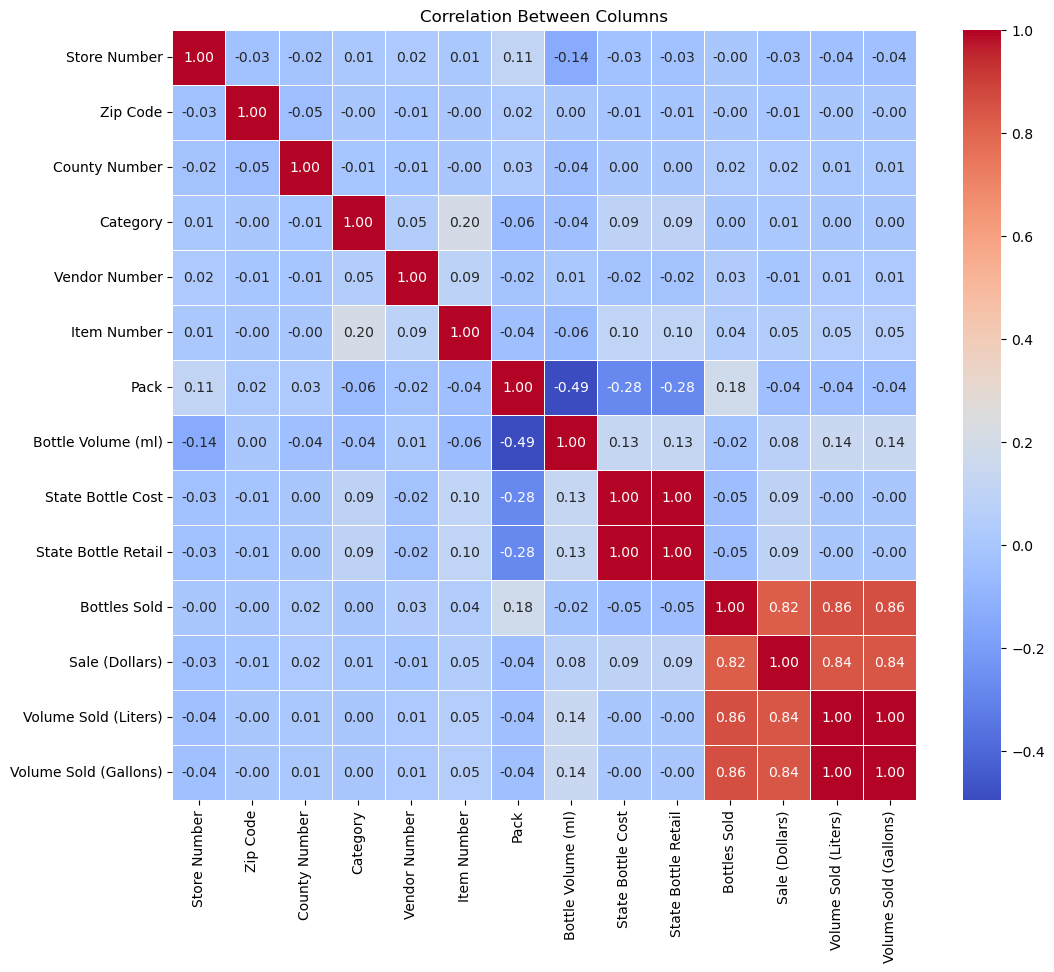

In [51]:
# Drop non-numeric columns if necessary
numeric_columns = df_fmt.select_dtypes(include=['float64', 'int64']).drop(['Year'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Columns')
plt.show()

In [66]:
df_fmt.to_csv('output.csv', index=False)